# Part II - (Prosper Loan Dataset Explanatory Project)
## by (Mayowa Shobande)

## Investigation Overview


> This is an explanatory analysis on Prosper Loan dataset. This presentation shows the result of the exploratory analysis performed on Prosper Loan dataset. In the analysis, features such as Borrowers Annual Percentage Rate, Borrowers Interest Rate, Borrowers Loan Status, Income range and Employment status were looked into to help predict borrowers loan outcomes over a period of time.


## Dataset Overview

> The data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan = pd.read_csv("C:/Users/shoba/Downloads/prosperLoanData.csv")

print("Data imported successfully.")

Data imported successfully.


### Data Wrangling

In [3]:
# create a copy of loan DataFrame

prosper_loan = loan.copy()

In [4]:
# drop columns not needed

prosper_loan.drop(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'ClosedDate','CreditGrade', 'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn', 'ProsperScore', 'ProsperRating (Alpha)', 'CurrentlyInGroup', 'GroupKey', 'DateCreditPulled', 'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years', 'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries', 'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years', 'PublicRecordsLast10Years', 'PublicRecordsLast12Months', 'RevolvingCreditBalance', 'BankcardUtilization', 'TotalTrades', 'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months', 'MemberKey', 'MonthlyLoanPayment', 'LP_CustomerPayments', 'LP_CustomerPrincipalPayments', 'LP_InterestandFees', 'LP_ServiceFees','LP_CollectionFees', 'LP_GrossPrincipalLoss', 'LP_NetPrincipalLoss', 'LP_NonPrincipalRecoverypayments', 'InvestmentFromFriendsCount', 'InvestmentFromFriendsAmount', 'Recommendations'], axis=1, inplace=True)

In [5]:
# convert LoanOriginationDate datatype from object to datetime

prosper_loan['LoanOriginationDate'] = prosper_loan['LoanOriginationDate'].astype('datetime64[ns]')

In [6]:
# convert ListingCategory (numeric) to category datatype

prosper_loan = prosper_loan.astype({"ListingCategory (numeric)":'category', "EmploymentStatus" : 'category', "ProsperRating (numeric)" : 'category', "IncomeRange" : 'category', "LoanStatus" : 'category'})

In [7]:

# Change values in ListingCategory variable to be Ordinal

# create a dictionary key for listingcategory (numeric)
listing_category_dict = {0: 'Not Available', 1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business', 4: 'Personal Loan',
                   5: 'Student Use', 6: 'Auto', 7: 'Other', 8: 'Baby& Adoption', 9: 'Boat', 
                   10: 'Cosmetic Procedure', 11: 'Engagement Ring', 12: ' Green Loans', 13: 'Household Expenses', 14: 'Large purchases', 
                   15: 'Medical/Dental', 16: 'Motorcycle', 17: 'RV', 18: 'Taxes', 19: 'Vacation', 20: 'Wedding Loans'}

In [8]:
# create a new column 'listing_category' to show the new categorical variables

prosper_loan['listing_category'] = prosper_loan['ListingCategory (numeric)'].map(listing_category_dict)

In [9]:
# Change values in ProsperRating (numeric) variable to be Ordinal

# create a dictionary key for ProsperRating (numeric)

prosper_rating_dict = {0: 'N/A', 1: 'HR', 2: 'E', 3: 'D', 4: 'C', 5: 'B', 6: 'A', 7: 'AA'}

In [10]:
# map ProsperRating (numeric)

prosper_loan['prosper_rating'] = prosper_loan['ProsperRating (numeric)'].map(prosper_rating_dict)

In [11]:
# convert the LoanOriginationDate to datetime

# add a column for Year
prosper_loan['Year'] = prosper_loan['LoanOriginationDate'].dt.year

## VIsualization

### Distribution of Borrowers Interest Rate 

> Interest rates are highly distributed from points 0.05 to 0.3 as borrowers take loans with low interest rate.

Text(0.5, 1.0, 'Borrowers Interest Rate')

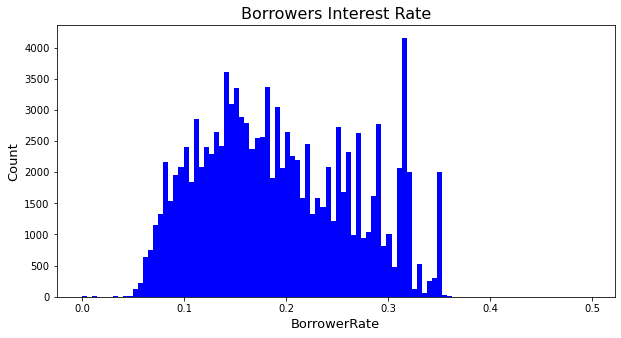

In [12]:
# figuresize
fig = plt.figure(figsize = (10, 5))

# plot histplot
plt.hist(data = prosper_loan, x = 'BorrowerRate', color = 'blue', bins = 100)
plt.xlabel('BorrowerRate', fontsize = 13)
plt.ylabel('Count', fontsize = 13)
plt.title('Borrowers Interest Rate', fontsize = '16')

### Borrowers Loan Term

> The highest loan term is 60 months. Most approved loan term is 36 months.

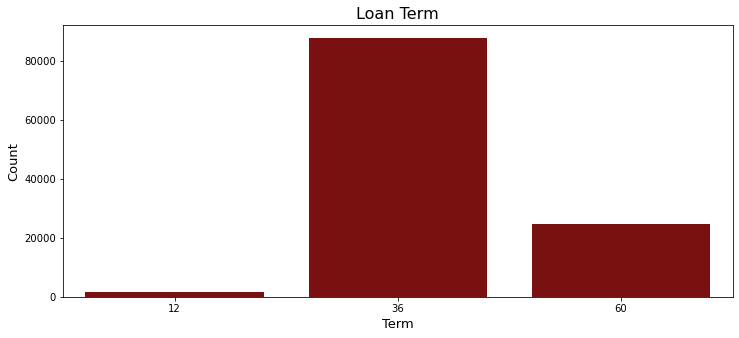

In [13]:
# figuresize
plt.figure(figsize = [12, 5])

# bar color
base_color = 'darkred'

# countplot
sns.countplot(data = prosper_loan, x = "Term", color = base_color);
plt.xlabel('Term', fontsize = '13');
plt.ylabel('Count', fontsize = '13');
plt.title('Loan Term', fontsize = '16');

## (Visualization 3)

> Majority of borrowers have not completed repayment of loan.

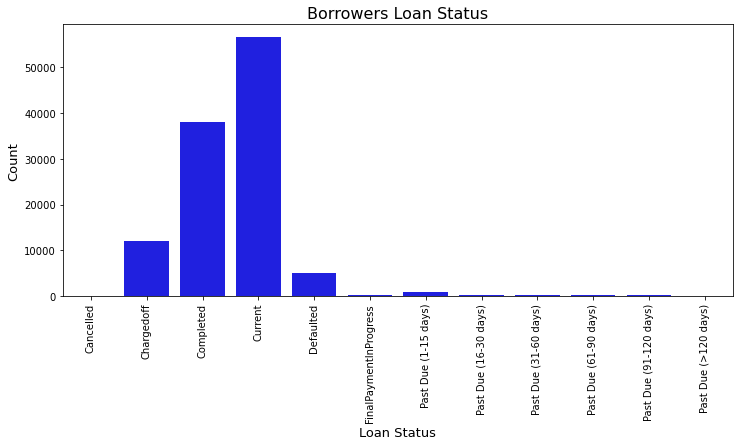

In [14]:
# figuresize
plt.figure(figsize = [12, 5])

# bar color
base_color = 'blue'

# countplot
sns.countplot(data = prosper_loan, x = 'LoanStatus', color = base_color);
plt.xlabel('Loan Status', fontsize = '13')
plt.ylabel('Count', fontsize = '13' )
plt.title('Borrowers Loan Status', fontsize = 16);
plt.xticks(rotation = '90')

# show plot
plt.show()

### Correlation Between Borrowers Annual Percentage Rate and Borrowers Interest Rate
There is high positive correlation between Borrowers Interest Rate and Borrowers Annual Percentage Rate.

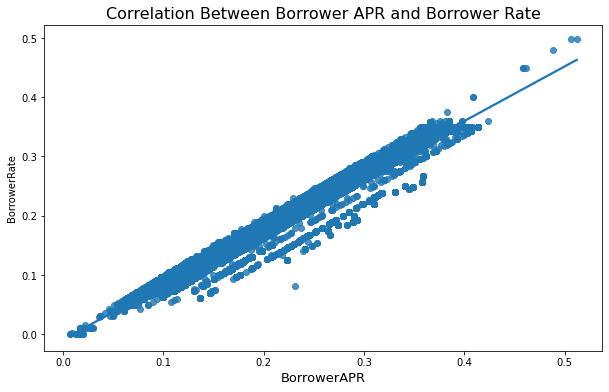

In [15]:
# figure size
plt.figure(figsize = [10, 6])
plt.xlabel('Borrowers Annual Percentage Rate', fontsize = '13')
plt.ylabel('Borrowers Interest Rate')
plt.title('Correlation Between Borrower APR and Borrower Rate', fontsize = '16')
sns.regplot(data = prosper_loan, x = 'BorrowerAPR', y = 'BorrowerRate');

### Impact of Borrowers Income Range on Loan Investors

Borrowers who earn high income have more investors.

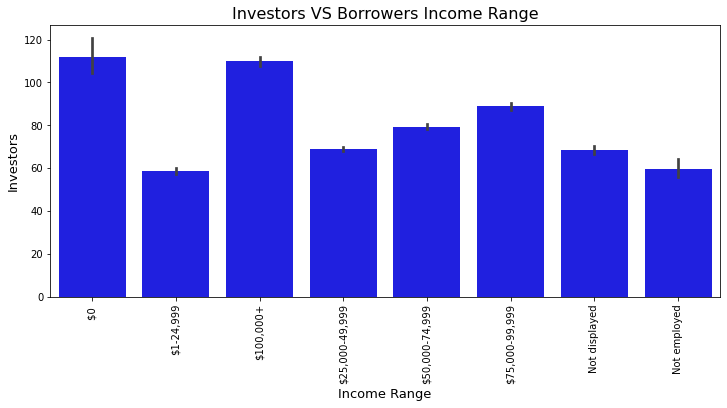

In [16]:
# figuresize
plt.figure(figsize = [12, 5])

# barplot
sns.barplot(data = prosper_loan, y = 'Investors', x='IncomeRange', color=base_color)
plt.xlabel('Income Range', fontsize = '13')
plt.ylabel('Investors', fontsize = '13')
plt.title('Investors VS Borrowers Income Range', fontsize = '16')
plt.xticks(rotation=90)
plt.show()

### Year VS Borrower Rate VS Loan Term

From 2005 till 2009, there was no information on borrowers interest for 12 months and 60 months loan term. Also, 36 months loan term is recorded as the common borrowers loan term over the years.

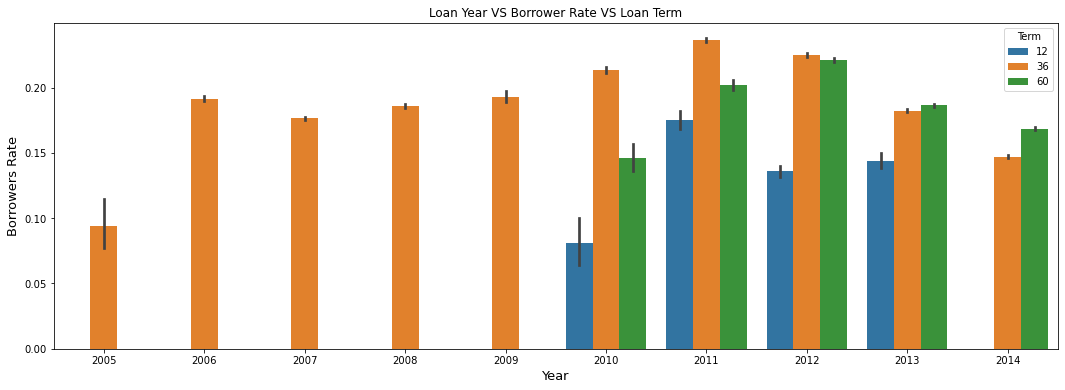

In [17]:
# figure size
plt.figure(figsize = [18, 6])

# barplot
sns.barplot(data = prosper_loan, x = 'Year', y= 'BorrowerRate', hue= 'Term')
plt.xlabel('Year', size = 13) 
plt.ylabel('Borrowers Rate', size = 13)
plt.title('Loan Year VS Borrower Rate VS Loan Term')
plt.show()

### Income Range VS Loan Original Amount VS Loan Term

As income range increases, borrowers loan original amount increases and the higher the loan amount, the higher the loan term.

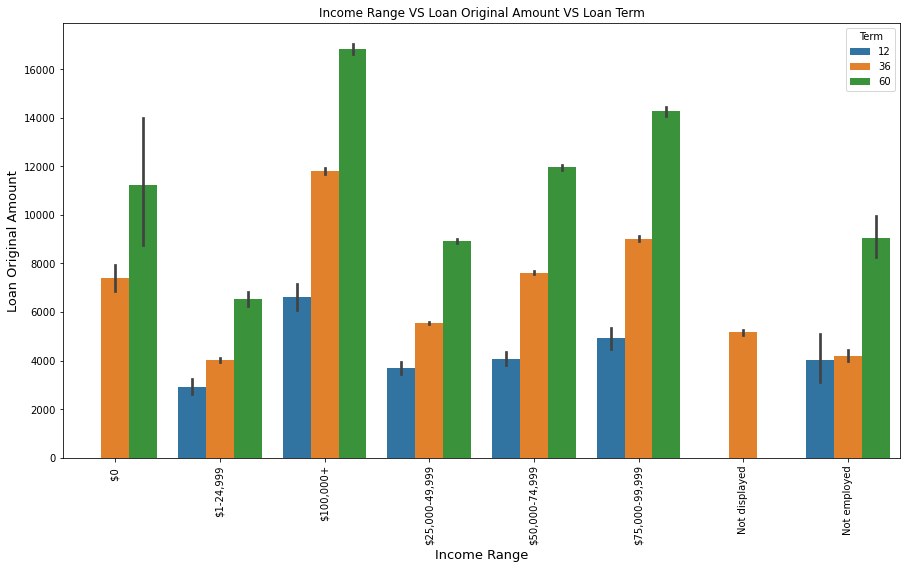

In [18]:
# figure size
plt.figure(figsize  = [15,8])

sns.barplot(data = prosper_loan, x = 'IncomeRange', y= 'LoanOriginalAmount', hue= 'Term')
plt.xlabel('Income Range', size = 13) 
plt.ylabel('Loan Original Amount', size = 13) 
plt.title('Income Range VS Loan Original Amount VS Loan Term')
plt.xticks(rotation = 90)
plt.show()

In [19]:
!jupyter nbconvert Prosper_Loan_Visualization_Part2.ipynb --to slides --post serve --no-input --no-prompt

^C
